In [ ]:
! pip install -q minisom


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone,pcolor, colorbar ,plot , show

In [ ]:
dataset_name = "Credit_Card_Applications.csv"

In [ ]:
data=pd.read_csv(dataset_name)
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [ ]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [ ]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)
# Initializing the weights
som.random_weights_init(X)
# Training
som.train_random(X, iterations)

In [ ]:
# Weights are:
wts = som.get_weights()

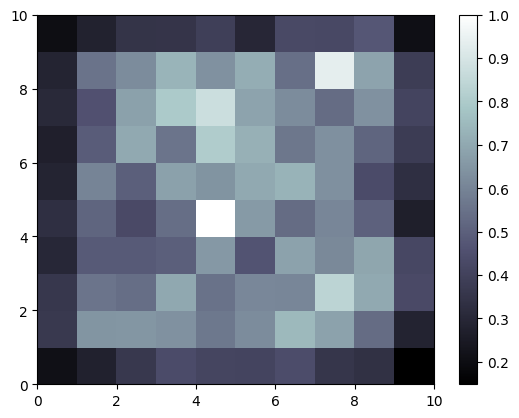

In [ ]:
bone()
pcolor(som.distance_map().T) # Distance map as bg
colorbar()
show()

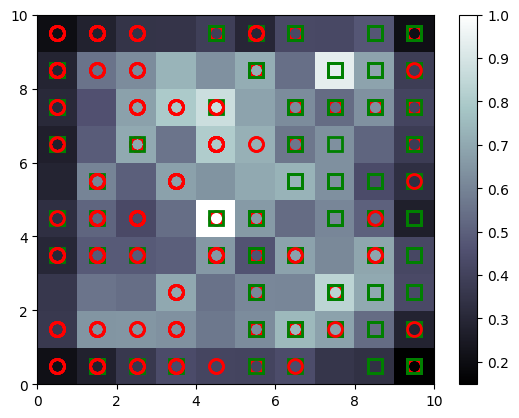

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar() # Legend

markers = ['o', 's'] # If the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)

In [ ]:
# Taking some of the red circular from the heat map and mapping as Frauds:
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)

In [ ]:
# these are two list of customers
frauds1 = sc.inverse_transform(frauds)

In [ ]:
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,27.83,1.000,1.0,2.0,8.0,3.000,0.0,0.0,0.0,0.0,2.0,176.0
1,1.0,21.08,4.125,1.0,3.0,8.0,0.040,0.0,0.0,0.0,0.0,2.0,140.0
2,1.0,21.08,10.085,1.0,10.0,8.0,1.250,0.0,0.0,0.0,0.0,2.0,260.0
3,1.0,21.17,0.250,1.0,8.0,8.0,0.250,0.0,0.0,0.0,0.0,2.0,280.0
4,1.0,62.75,7.000,2.0,10.0,9.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0
5,1.0,18.17,10.250,2.0,8.0,8.0,1.085,0.0,0.0,0.0,0.0,2.0,320.0
6,1.0,23.92,0.585,1.0,13.0,8.0,0.125,0.0,0.0,0.0,0.0,2.0,240.0
7,1.0,21.17,0.875,1.0,8.0,8.0,0.250,0.0,0.0,0.0,0.0,2.0,280.0
8,1.0,29.83,2.040,1.0,14.0,8.0,0.040,0.0,0.0,0.0,0.0,2.0,128.0
9,0.0,20.75,10.335,2.0,13.0,8.0,0.335,1.0,1.0,1.0,1.0,2.0,80.0
